In [74]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Append base directory
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
path1p = os.path.dirname(currentdir)
path2p = os.path.dirname(path1p)
libpath = os.path.join(path1p, "lib")
pwd_mat = os.path.join(os.path.join(path2p, "data/"), "sim_ds_mat")
pwd_h5 = os.path.join(os.path.join(path2p, "data/"), "sim_ds_h5")

sys.path.insert(0, libpath)
print("Appended library directory", libpath)

# User libraries
from matlab.matlab_yaro_lib import read_mat
from corr_lib import sprMat
from qt_wrapper import gui_fpath

Appended library directory /media/aleksejs/DataHDD/work/codes/theoretical-models/experimental-bridge/nest-mesoscopic-metric-test/codes/lib


## 0. Loading data

In [3]:
# Read LVM file from command line
data_path = gui_fpath("Select data directory", "./")
data, behaviour = read_mat(data_path)

# Get parameters
nTrials, nTimes, nChannels = data.shape
print("Loaded neuronal data with (nTrials, nTimes, nChannels)=", data.shape)

Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_15/mtp_15_2018_05_16_a
Loaded neuronal data with (nTrials, nTimes, nChannels)= (338, 201, 12)


# 1. Autoregression

## 1.1 Autocorrelation

First attempt at studying the data - autocorrelation. Should give indication at how well the data predicts itself

**Conclusions**:
* Why are there oscillations in the autocorrelation - ah, of course, because of decay-conv :)
* Data significantly autocorrelated - for most channel pairs it is best explained by 0-time-shift. Hence, there is a global brain state that synchronizes most channels. 

**TODO**:
* *[Priority Med]* See if global brain state can be subtracted somehow. Otherwise, there is significant ambiguity in what predicts what.
* *[Priority Low]* See if convolution time can be estimated from data. See if we can deconvolve 

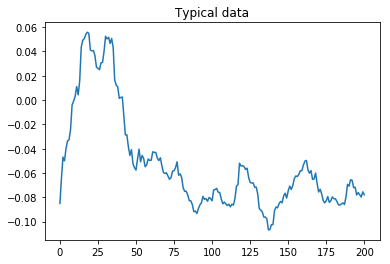

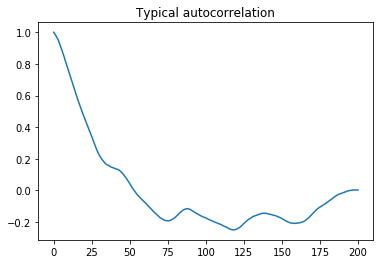

In [82]:
def crosscorr(x, y, withNorm = True):
    xdev = x - np.mean(x)
    ydev = y - np.mean(y)
    rez = np.correlate(xdev, ydev, mode='full')[x.size-1:]
    if withNorm:
        s2_x = np.correlate(xdev, xdev)
        s2_y = np.correlate(ydev, ydev)
        return rez / np.sqrt(s2_x * s2_y)
    else:
        return rez

plt.figure()
plt.title("Typical data")
plt.plot(data[0, :, 2])
plt.show()
    
plt.figure()
plt.title("Typical autocorrelation")
plt.plot(crosscorr(data[0, :, 2], data[0, :, 2]))
plt.show()

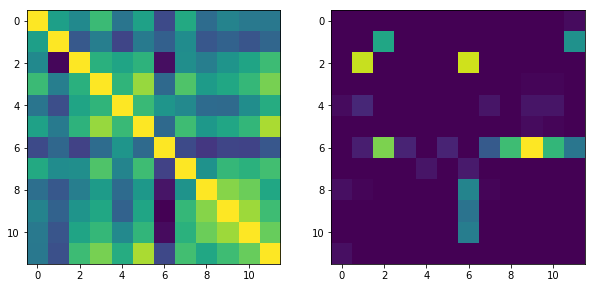

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.517612,0.416268,0.646992,0.321209,0.526561,0.142263,0.565279,0.282431,0.388533,0.339310,0.334743
1,0.517612,1.000000,0.199814,0.366823,0.126014,0.345265,0.232009,0.431242,0.194643,0.239550,0.183775,0.259192
2,0.416268,-0.086187,1.000000,0.596375,0.538362,0.606441,-0.066567,0.438832,0.366751,0.465653,0.541336,0.652433
3,0.646992,0.366823,0.596375,1.000000,0.618473,0.829480,0.272399,0.695952,0.500906,0.554043,0.632010,0.774152
4,0.324828,0.156751,0.538362,0.618473,1.000000,0.642543,0.469032,0.412068,0.278383,0.274299,0.433602,0.576802
5,0.526561,0.345265,0.606441,0.829480,0.642543,1.000000,0.269568,0.656094,0.483624,0.547330,0.624950,0.857938
6,0.142263,0.263635,0.109457,0.283260,0.469032,0.276296,1.000000,0.139015,0.070285,0.122673,0.114062,0.193600
7,0.565279,0.431242,0.438832,0.695952,0.392097,0.656094,0.111953,1.000000,0.458861,0.630821,0.600564,0.666787
8,0.297916,0.196815,0.366751,0.500906,0.278383,0.483624,-0.043552,0.460538,1.000000,0.799846,0.749431,0.551199
9,0.388533,0.239550,0.465653,0.550798,0.240848,0.543914,-0.107611,0.630821,0.799846,1.000000,0.838294,0.655741


,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,0,42,0,0,0,0,0,0,0,0,36
2,0,65,0,0,0,0,66,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,1,0
4,2,8,0,0,0,0,0,4,0,4,4,0
5,0,0,0,0,0,0,0,0,0,2,1,0
6,0,6,57,7,0,7,0,20,49,71,47,28
7,0,0,0,0,4,0,5,0,0,0,0,0
8,3,1,0,0,0,0,32,1,0,0,0,0
9,0,0,0,0,0,0,27,0,0,0,0,0


In [75]:
def crosscorr_multitrial(xx, yy):
    sumautox = np.sum([np.correlate(x - np.mean(x), x - np.mean(x)) for x in xx])
    sumautoy = np.sum([np.correlate(y - np.mean(y), y - np.mean(y)) for y in yy])
    sumcorr = np.sum([crosscorr(x, y, False) for x,y in zip(xx, yy)], axis=0)
    return sumcorr / np.sqrt(sumautox * sumautoy)
    

corr_max  = np.zeros((nChannels, nChannels))
corr_maxt = np.zeros((nChannels, nChannels), dtype=int)

for iCh in range(nChannels):
    for jCh in range(nChannels):
        corr = crosscorr_multitrial(data[:, :, iCh], data[:, :, jCh])#[:25]
        corr_maxt[iCh][jCh] = np.argmax(np.abs(corr))
        corr_max[iCh][jCh]  = corr[corr_maxt[iCh][jCh]]
        

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(corr_max)
ax[1].imshow(corr_maxt)
plt.show()

display(pd.DataFrame(corr_max))
display(pd.DataFrame(corr_maxt))

## 1.2 Naive model v0.1 - Global activity model

Let's assume that all channels are rescaled versions of one and the same channel. Then there is a hidden underlying activity 

$$x_{ij} = \alpha_i v_j$$

Then

$$L^2 = \sum_{ij} |x_{ij} - \alpha_i v_j |^2 \rightarrow \min$$

In [120]:
X_0 = data[0, :, :]
min_ax = np.min(X_0.shape)
XXT = X_0.dot(X_0.T)
XTX = X_0.T.dot(X_0)
print(XXT.shape)
print(XTX.shape)

# Compute eigendecomposition
eig1, v1 = np.linalg.eig(XXT)
eig2, v2 = np.linalg.eig(XTX)

# Discard imaginary part - all eigenvalues must be positive definite
eig1, v1 = np.real(eig1), np.real(v1)
eig2, v2 = np.real(eig2), np.real(v2)

# Normalize eigenvectors
v1 = np.array([v / np.linalg.norm(v) for v in v1])

v1 = np.array([v / np.linalg.norm(v) for v in v1])
v2 = np.array([v / np.linalg.norm(v) for v in v2])

# Sort the eigenvalues and choose only the intersecting ones
idx1 = np.flip(np.argsort(eig1))
idx2 = np.flip(np.argsort(eig2))
eig1, v1 = eig1[idx1][:min_ax], v1[idx1][:min_ax]
eig2, v2 = eig2[idx2][:min_ax], v2[idx2][:min_ax]
print("Testing that the eigenvalues fully match", np.max(np.abs(eig1 - eig2)))

print(X_0.shape)
print(np.outer(v1[0], v2[0]).shape)

for A2, alpha, v in zip(eig2, v2, v1):
    A_est = v.dot(X_0.dot(alpha))
    err = np.linalg.norm(X_0 - A_est * np.outer(v, alpha))
    rel_err = err / np.linalg.norm(X_0)
    
    print(np.sqrt(A2), A_est, rel_err)

(201, 201)
(12, 12)
Testing that the eigenvalues fully match 1.5543122344752192e-15
(201, 12)
(201, 12)
1.338850061960111 -0.00645907951714076 0.9999922476739596
0.7606290489872765 0.0011887648898195908 0.9999997374082483
0.4221832226679979 0.07445905474285969 0.998969262680909
0.22252570964821858 -0.043397918499702016 0.9996499719101644
0.20462486248874712 0.0038874101331999224 0.9999971919139079
0.1309335148264944 0.026799539779498227 0.9998665333564182
0.10909547975822856 -0.01005362876636164 0.9999812181290665
0.09444781612317542 0.120130248112426 0.9973147958577181
0.07877867988131572 0.00854063686966667 0.9999864458420873
0.05373103858844772 0.0007792271485068491 0.9999998871719044
0.04556858052183224 0.018137047727512828 0.999938872652697
0.030947915783402405 -0.016783736679198077 0.9999476546913194


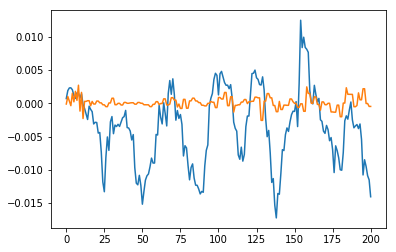

In [141]:
idx = 10
plt.figure()
plt.plot(X_0[:, 0])
plt.plot(np.sqrt(eig2[idx]) * v1[idx] * v2[idx][0])
plt.show()

In [165]:
import scipy.optimize

X_0 = data[0, :, :]
x0 = np.random.uniform(-1, 1, 1 + nTimes + nChannels)

def unpack(x):
    return x[0], x[1:1+nTimes], x[1+nTimes:]

def xhat(a, v, e):
    return a * np.outer(v, np.exp(e))

def LF(x):
    a, v, e = unpack(x)
    return np.linalg.norm(X_0 - xhat(a, v, e))
    
fit_obj = scipy.optimize.minimize(LF, x0, method='CG')
print(fit_obj.success, fit_obj.message, fit_obj.fun)

False Desired error not necessarily achieved due to precision loss. 1.2470700560285186


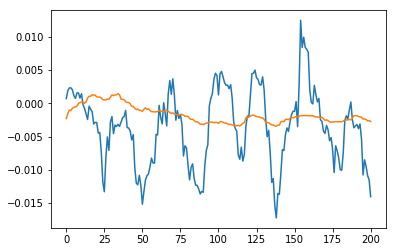

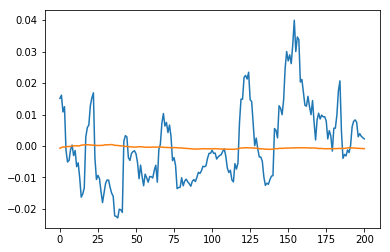

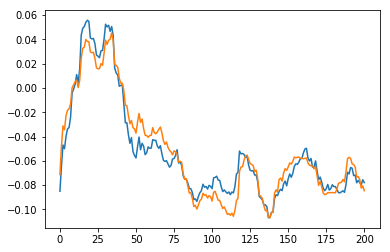

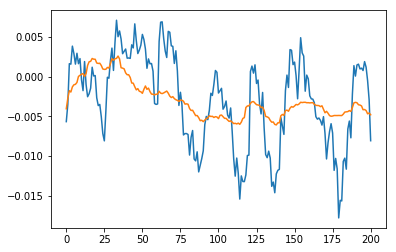

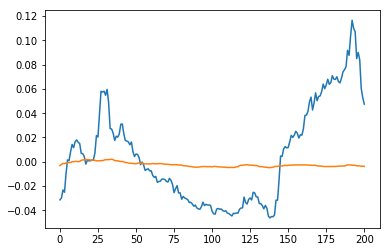

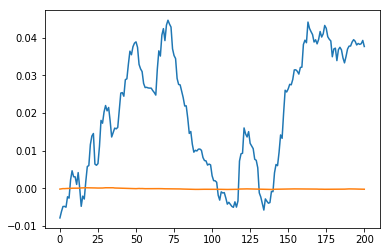

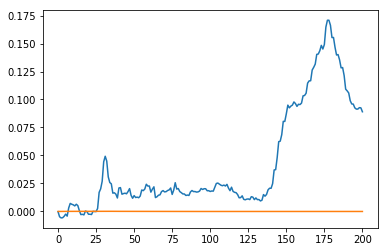

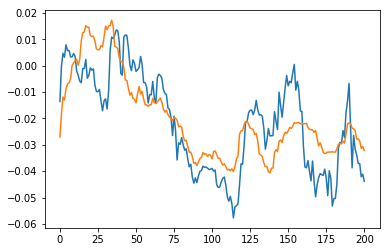

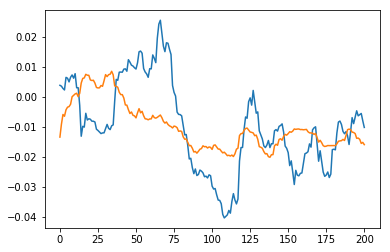

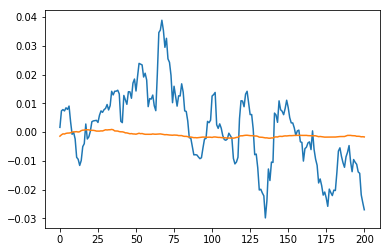

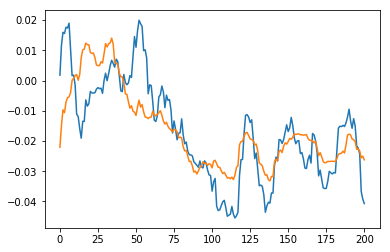

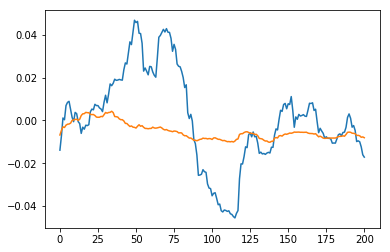

In [166]:
A, v_arr, e_arr = unpack(fit_obj.x)

for i in range(nChannels):
    plt.figure()
    plt.plot(X_0[:, i])
    plt.plot(xhat(A, v_arr, e_arr[i]))
    plt.show()
